# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dhannyo Putta
- **Email:** m776b4ky1092@bangkit.academy
- **ID Dicoding:** dhannyo_putta

## Menentukan Pertanyaan Bisnis

- Bagaimana waktu dan hari mempengaruhi penggunaan rental sepeda?
- Apakah faktor-faktor yang mempengaruhi permintaan rental sepeda dalam setahun?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, kita memanggil semua library yang diperlukan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, kita memuat kedua day.csv dan hour.csv ke dalam Pandas dataframe. Selanjutnya kita juga menampilkan 5 entry teratas dari setiap dataframe.

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat beberapa kolom yang dapat dianalisis dari day_df dan hour_df. Pada kedua dataframe terdapat kolom seperti "season" untuk menunjukkan musim, "holiday", "weekday", dan "working day" untuk menunjukkan hari libur dan hari kerja, serta informasi cuaca seperti "temp", "atemp", "hum", dan "windspeed" yang dapat ditelusuri lebih lanjut pengaruhnya terhadap jumlah penggunaan rental sepeda.
- Secara observasi sekilas dari 5 entry teratas, dapat di lihat bahwa waktu hari dan temperatur memiliki pengaruh yang cukup signifikan terhadap jumlah penggunaan rental sepeda.

### Assessing Data

Kita memulai proses assessing data dengan menampilkan informasi dan jumlah missing values dari day_df.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


Dari informasi yang telah ditampilkan, kita tidak menepmukan adanya masalah dari data di seluruh kolom dalam dataframe ini. Semua kolom memiliki jumlah data yang sama yang menyatakan bahwa tidak ada missing values pada day_df. Tidak ditemukan adanya duplikasi pada dataframe dan semua nilai parameter ada pada angka wajar.

Selanjutnya, kita akan melakukan tahapan yang sama untuk hour_df.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


Dari informasi yang telah ditampilkan, kita juga tidak menemukan adanya masalah dari data di seluruh kolom dalam dataframe ini. Semua kolom memiliki jumlah data yang sama yang menyatakan bahwa tidak ada missing values pada hour_df. Tidak ada duplikasi data dan semua nilai ada pada angka wajar.

**Insight:**
- Seluruh kolom pada day_df memiliki jumlah data yang sama. Hal ini juga sama untuk hour_df
- Dari informasi yang telah ditampilkan, kita tidak menepmukan adanya missing values pada kedua dataframe. Bisa dinyatakan bahwa tidak ada masalah dari data di seluruh kolom dalam kedua dataframe ini.
- Tidak ditemukan duplikasi ataupun nilai yang janggal dalam kedua dataframe ini namun ada perbedaan jumlah situasi cuaca unik pada kolom "weathersit" pada kedua tabel.

### Cleaning Data

In [12]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Kita memastikan kembali tidak ada duplikasi dalam data. Meskipun tidak ditemukan adanya missing values dan kejanggalan pada data, kita dapat melakukan beberapa koreksi agar data lebih mudah diolah. Pertama kita akan drop kolom "instant" yang hanya merupakan index untuk setiap baris.

In [14]:
day_df.drop(columns = "instant", inplace = True)
hour_df.drop(columns = "instant", inplace = True)

In [15]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya kita akan mengubah datatype dari kolom dteday dari "object" menjadi "np.datetime64" dan menggunakan kolom ini sebagai index pengurut dari data yang kita gunakan.

In [17]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.set_index("dteday", inplace = True)

In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.set_index("dteday", inplace = True)

Selanjutnya kita juga akan mengubah beberapa nama kolom agar lebih tidak ambigu.

In [19]:
day_df = day_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hum':'humidity',
                       'cnt':'count'})

hour_df = hour_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

Kita juga akan mengubah beberapa kolom menjadi datatype category.

In [20]:
columns = ["season","month","year","holiday","weekday","workingday","weather"]

for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

hour_df["hour"] = hour_df["hour"].astype("category")

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   year        731 non-null    category
 2   month       731 non-null    category
 3   holiday     731 non-null    category
 4   weekday     731 non-null    category
 5   workingday  731 non-null    category
 6   weather     731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   humidity    731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  casual      731 non-null    int64   
 12  registered  731 non-null    int64   
 13  count       731 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 52.1 KB


In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  category
 3   hour        17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  count       17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.2 MB


**Insight:**
- Kita telah memastikan tidak adanya duplikasi, missing value, dan kejanggalan pada data.
- Kolom "instant" didrop karena tidak memberikan informasi apapun untuk analisis dan kolom "dteday" sekarang memiliki datatype "np.datetime64". Kolom "season", "year, "month", "hour", "holiday", "working day", dan "weather" diubah menjadi datatype "category".

In [23]:
day_df['weather'].value_counts()

,count
weather,
1,463
2,247
3,21


Selanjutnya kita juga dapat melihat bahwa kategori seperti kondisi cuaca direpresentasikan oleh encoding angka 1, 2, dan 3. Untuk memudahkan proses analisis selanjutnya, kita akan mengubah encoding kategoris ini menjadi string dari kondisi cuaca berdasarkan yang telah tertera pada readme dataset ini.

In [24]:
day_df['weather'].replace({1: "Clear/Cloudy", 2: "Mist", 3: "Light Rain/Light Snow", 4: "Heavy Rain/Heavy Snow"}, inplace = True)
hour_df['weather'].replace({1: "Clear/Cloudy", 2: "Mist", 3: "Light Rain/Light Snow", 4: "Heavy Rain/Heavy Snow"}, inplace = True)
day_df.head()

<ipython-input-24-cc25e8f06803>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weather'].replace({1: "Clear/Cloudy", 2: "Mist", 3: "Light Rain/Light Snow", 4: "Heavy Rain/Heavy Snow"}, inplace = True)
<ipython-input-24-cc25e8f06803>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weather'].replace

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
day_df['weather'].value_counts()

,count
weather,
Clear/Cloudy,463
Mist,247
Light Rain/Light Snow,21


Kita akan melakukan hal ini kepada setiap data kategoris yang merupakan bentuk encoding.

In [26]:
day_df['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace = True)
hour_df['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace = True)
day_df['weekday'].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}, inplace = True)
hour_df['weekday'].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}, inplace = True)
day_df.head()

<ipython-input-26-830be1a710b3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace = True)
<ipython-input-26-830be1a710b3>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'].replace({1: "Spring", 2: "Summer", 3: "Fall",

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
dteday,,,,,,,,,,,,,,
2011-01-01,Spring,0,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,Spring,0,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,Spring,0,1,0,Monday,1,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,Spring,0,1,0,Tuesday,1,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,Spring,0,1,0,Wednesday,1,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

Untuk tahap exploratory data analysis (EDA), kita akan membuat beberapa pivot table untuk membantu kita mendeskripsikan adanya variasi jumlah pengguna pada kategori waktu, hari, cuaca, dan musim yang berbeda.

### Explorasi Jumlah Pengguna Berdasarkan Waktu dan Hari

Kita akan memulai eksplorasi day_df dengan dengan melihat kembali rangkuman parameter statistik dari day_df.

In [27]:
day_df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari parameter statistik di atas, kita menemukan adanya perbedaan cukup signifikan antara nilai **min, mean, dan max** pada jumlah pengguna rental sepeda. **Standar deviasi** juga memiliki nilai yang sangat tinggi. **IQR** untuk jumlah pengguna rental sepeda cukuplah wajar. Secara umum jumlah pengguna "registered" lebih banyak dibandingkan dengan jumlah pengguna "casual".

Selanjutnya kita juga akan mengeksplor jumlah data unik pada kolom-kolom kategoris yang telah ditetapkan.

In [28]:
day_df.nunique()

,0
season,4
year,2
month,12
holiday,2
weekday,7
workingday,2
weather,3
temp,499
atemp,690
humidity,595


Dari informasi di atas, day_df mencakup 4 musim, 2 tahun, 12 bulan, 7 hari, dan 3 jenis cuaca. Kita dapat melakukan eksplorasi pada jumlah pengguna berdasarkan kolom-kolom kategoris yang berkaitan. Kita mulai dengan waktu dan hari.

In [29]:
hour_df.groupby(by="hour").agg({
    "count" : "mean"})

<ipython-input-29-b6eb101dd50b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hour").agg({


,count
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [30]:
day_df.groupby(by="weekday").agg({
    "count" : "mean"})

<ipython-input-30-56697aecc04c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday").agg({


,count
weekday,
Sunday,4228.828571
Monday,4338.123810
Tuesday,4510.663462
Wednesday,4548.538462
Thursday,4667.259615
Friday,4690.288462
Saturday,4550.542857


In [31]:
hour_df.groupby(by=["weekday", "hour"]).agg({
    "count" : "mean"})

<ipython-input-31-7a08dd4ddb70>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["weekday", "hour"]).agg({


count
weekday  hour            
Sunday   0      93.990385
         1      77.432692
         2      61.627451
         3      31.144231
         4       9.362745
...                   ...
Saturday 19    239.932692
         20    180.865385
         21    156.000000
         22    139.663462
         23    115.855769

[168 rows x 1 columns]

**Insight:**
- Kita dapat melihat adanya perbedaan jumlah rata-rata pengguna pada waktu dan hari yang berbeda.
- Kita juga dapat menganalisis adanya perbedaan jumlah rata-rata pengguna untuk setiap kombinasi antara waktu dan hari.

### Eksplorasi Jumlah Pengguna Berdasarkan Musim dan Kondisi Cuaca

In [32]:
day_df.groupby(by="season").agg({
    "count" : "mean"})

<ipython-input-32-5930df7b2a33>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,count
season,
Spring,2604.132597
Summer,4992.331522
Fall,5644.303191
Winter,4728.162921


In [33]:
day_df.groupby(by="weather").agg({
    "count" : "mean"})

<ipython-input-33-68668dca8a94>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weather").agg({


,count
weather,
Clear/Cloudy,4876.786177
Mist,4035.862348
Light Rain/Light Snow,1803.285714


In [34]:
day_df.groupby(by=["season", "weather"]).agg({
    "count" : "mean"})

<ipython-input-34-75787d05d716>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["season", "weather"]).agg({


count
season weather                           
Spring Clear/Cloudy           2811.135135
       Mist                   2357.166667
       Light Rain/Light Snow   934.750000
Summer Clear/Cloudy           5548.548673
       Mist                   4236.705882
       Light Rain/Light Snow  1169.000000
Fall   Clear/Cloudy           5878.257353
       Mist                   5222.479167
       Light Rain/Light Snow  2751.750000
Winter Clear/Cloudy           5043.563107
       Mist                   4654.000000
       Light Rain/Light Snow  1961.600000

**Insight:**
- Secara sekilas terlihat adanya perbedaan signifikan dalam jumlah rata-rata pengguna antara musim dan cuaca yang berbeda.
- Terdapat pula perbedaan rata-rata jumlah pengendara pada kombinasi musim dan cuaca yang berbeda.

### Eksplorasi Jumlah Pengguna Berdasarkan Waktu, Hari, dan Cuaca serta Musim

In [35]:
hour_df.groupby(by=["weekday", "hour", "season"]).agg({
    "count" : "mean"})

<ipython-input-35-0b3d22dfc3e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["weekday", "hour", "season"]).agg({


count
weekday  hour season            
Sunday   0    Spring   47.740741
              Summer   97.884615
              Fall    130.320000
              Winter  103.192308
         1    Spring   42.407407
...                          ...
Saturday 22   Winter  136.520000
         23   Spring   57.370370
              Summer  127.730769
              Fall    163.615385
              Winter  117.000000

[672 rows x 1 columns]

In [36]:
hour_df.groupby(by=["weekday", "hour", "weather"]).agg({
    "count" : "mean"})

<ipython-input-36-3b8c943e819c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["weekday", "hour", "weather"]).agg({


count
weekday  hour weather                          
Sunday   0    Clear/Cloudy            98.253521
              Mist                    88.857143
              Light Rain/Light Snow   62.200000
              Heavy Rain/Heavy Snow         NaN
         1    Clear/Cloudy            78.617647
...                                         ...
Saturday 22   Heavy Rain/Heavy Snow         NaN
         23   Clear/Cloudy           119.808824
              Mist                   112.967742
              Light Rain/Light Snow   80.000000
              Heavy Rain/Heavy Snow         NaN

[672 rows x 1 columns]

**Insight:**
- Beberapa kombinasi tidak memiliki data sehingga bernilai rata-rata NaN.
- Musim dan cuaca mempengaruhi jumlah rata-rata pengguna untuk berbagai kombinasi waktu dan hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana waktu dan hari mempengaruhi penggunaan rental sepeda?

<ipython-input-37-c9974e0d912b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weekday', y='count', palette = "rocket", ax=axis)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

[Text(0.5, 0, '')]

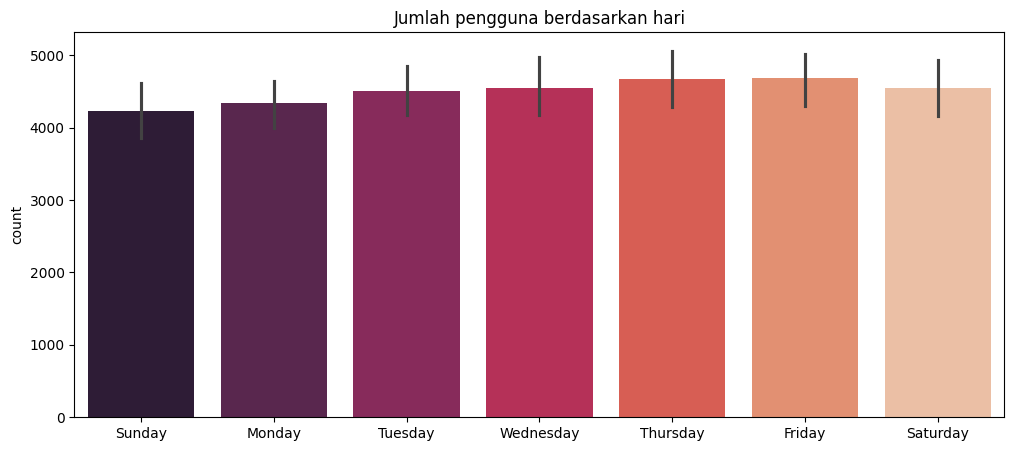

In [37]:
figure, axis = plt.subplots(figsize=(12,5))
sns.barplot(data=day_df, x='weekday', y='count', palette = "rocket", ax=axis)
axis.set(title='Jumlah pengguna berdasarkan hari')
axis.set(xlabel=None)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

[Text(0.5, 1.0, 'Jumlah pengguna rental sepeda untuk waktu dan hari yang berbeda')]

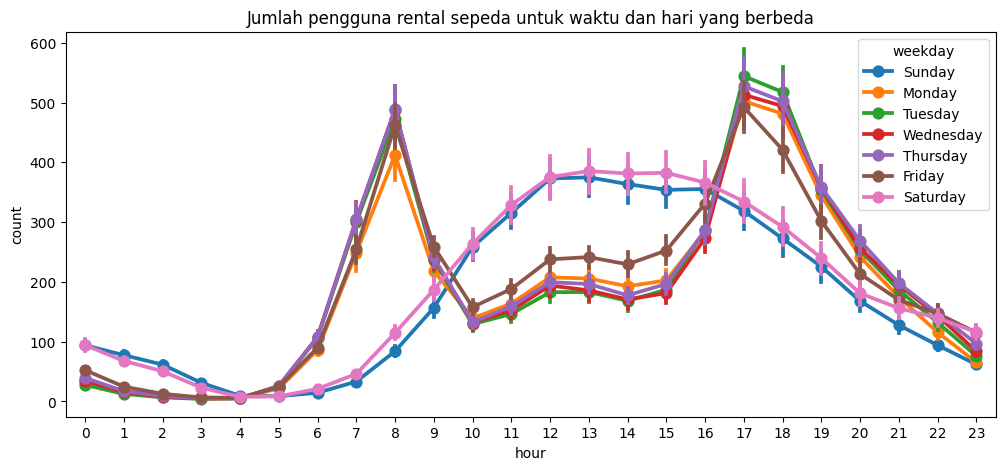

In [38]:
figure, axis = plt.subplots(figsize=(12,5))
sns.pointplot(data=hour_df, x='hour', y= 'count', hue='weekday', ax=axis)
axis.set(title="Jumlah pengguna rental sepeda untuk waktu dan hari yang berbeda")

Dari informasi yang telah kita dapatkan pada tahap EDA disertai dengan tahap visualisasi data, kita dapat menyatakan bahwa rata-rata jumlah pengguna untuk setiap hari cukup mirip antara satu sama lain. Jumlah penggunaan rental sepeda pada hari kerja memuncak antara pukul 7:00-9:00 dan 16:00-19:00. Sedangkan pada akhir pekan, jumlah penggunaan rental sepeda perlahan meningkat dari pukul 7:00, memuncak pada pukul 12:00-16:00 dan turun perlahan menuju malam hari.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


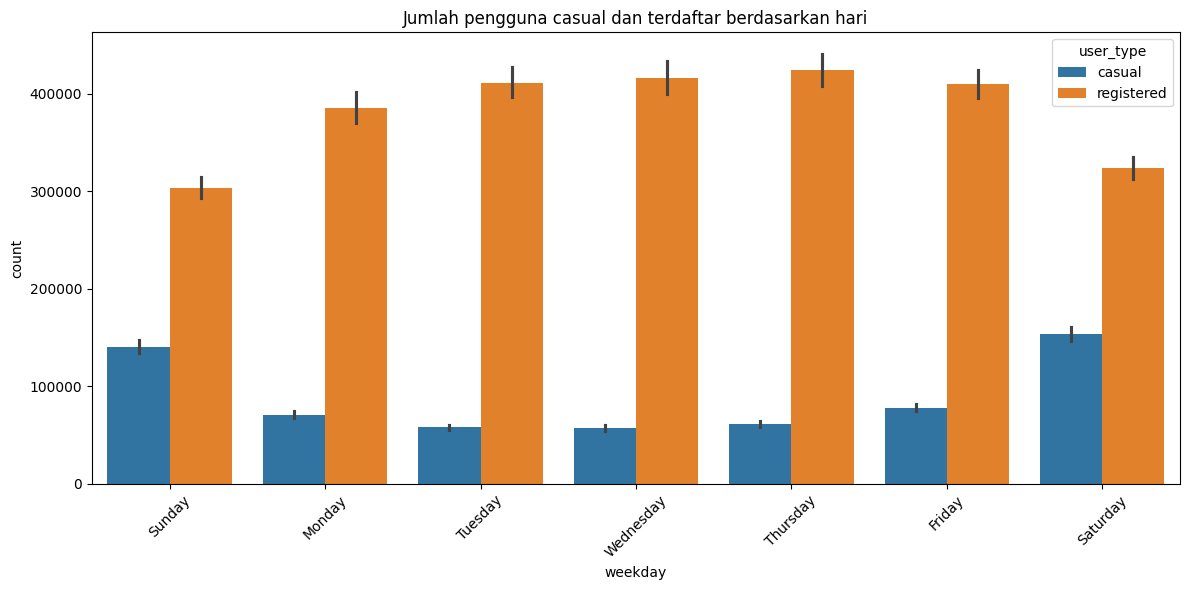

In [39]:
melted_df = hour_df.melt(id_vars=['weekday'], value_vars=['casual', 'registered'],
                          var_name='user_type', value_name='rental_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='weekday', y='rental_count', hue='user_type', estimator=sum)

plt.title('Jumlah pengguna casual dan terdaftar berdasarkan hari')
plt.xlabel('weekday')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

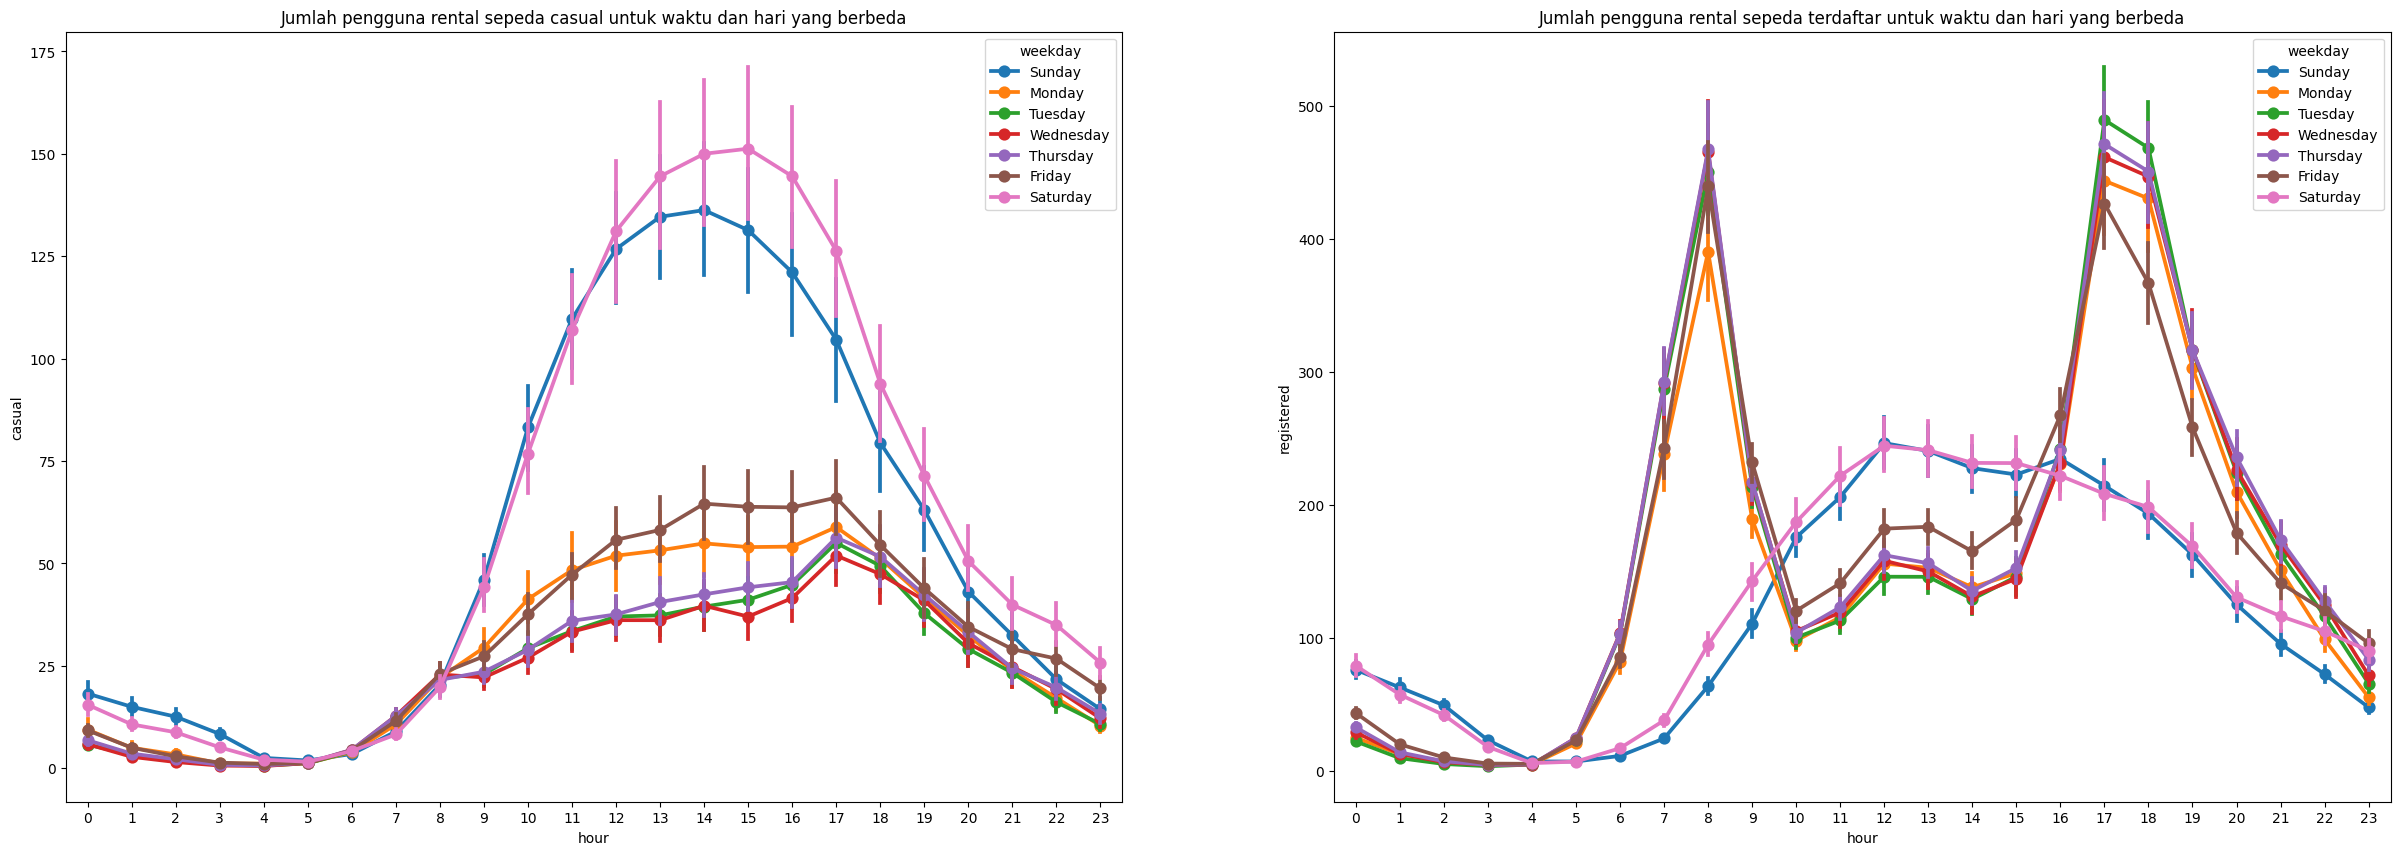

In [40]:
figure, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.pointplot(data=hour_df, x='hour', y='casual', hue='weekday', ax=axes[0])
axes[0].set(title='Jumlah pengguna rental sepeda casual untuk waktu dan hari yang berbeda')

sns.pointplot(data=hour_df, x='hour', y='registered', hue='weekday', ax=axes[1])
axes[1].set(title='Jumlah pengguna rental sepeda terdaftar untuk waktu dan hari yang berbeda')

plt.show()

Terdapat peningkatan signifikan untuk jumlah pengguna casual (yang tidak terdaftar) pada akhir pekan terutama di tengah hari. Di sisi lain, jumlah pengguna terdaftar memiliki bentuk tren menyerupai tren dari grafik pertama. Hal ini menunjukkan bahwa jumlah pengguna casual cukup mempengaruhi jumlah pengguna total di akhir pekan, tetapi memiliki kontribusi yang cukup kecil pada hari kerja.

### Pertanyaan 2: Apakah faktor-faktor yang mempengaruhi permintaan rental sepeda dalam setahun?

<ipython-input-41-5624055cea53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour_df, x='weather', y='count', palette="mako_r", showfliers=False, ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

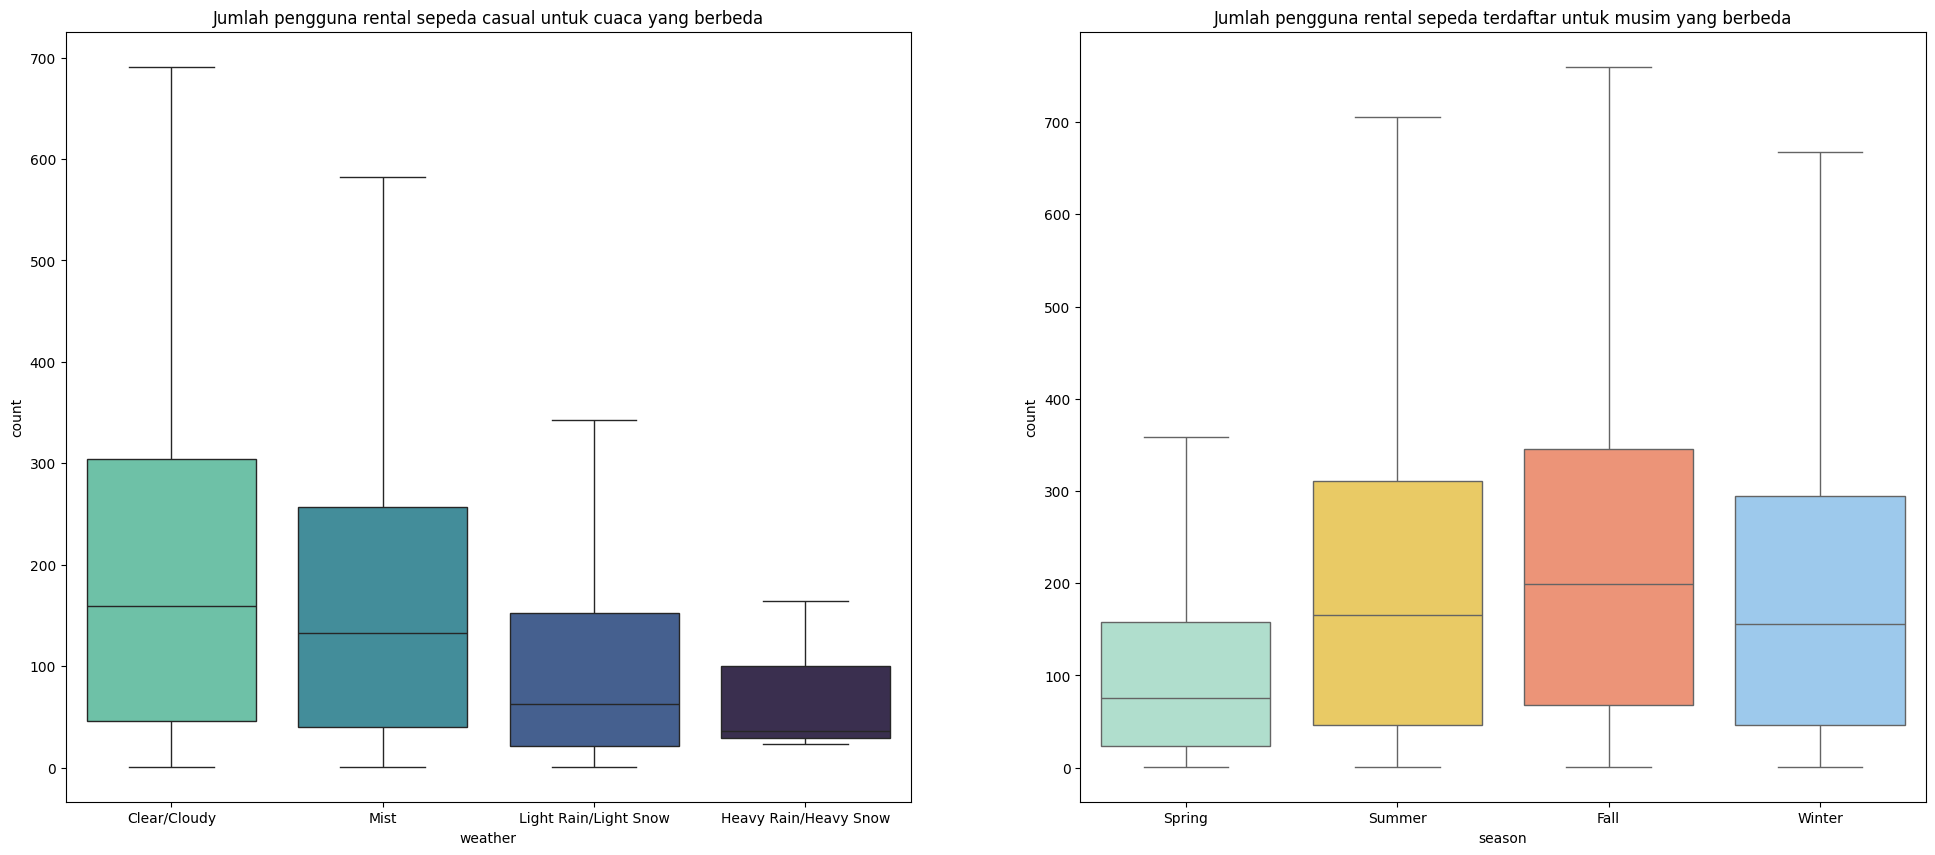

In [41]:
custom_palette = ['#A8E6CF',
                  '#FFD54F',
                  '#FF8A65',
                  '#90CAF9']

figure, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.boxplot(data=hour_df, x='weather', y='count', palette="mako_r", showfliers=False, ax=axes[0])
axes[0].set(title='Jumlah pengguna rental sepeda casual untuk cuaca yang berbeda')

sns.boxplot(data=hour_df, x='season', y='count', palette=custom_palette, showfliers=False, ax=axes[1])
axes[1].set(title='Jumlah pengguna rental sepeda terdaftar untuk musim yang berbeda')

plt.show()

Dapat terlihat bahwa jumlah pengguna rental sangatlah bergantung pada kondisi cuaca serta musim yang sedang berlangsung.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

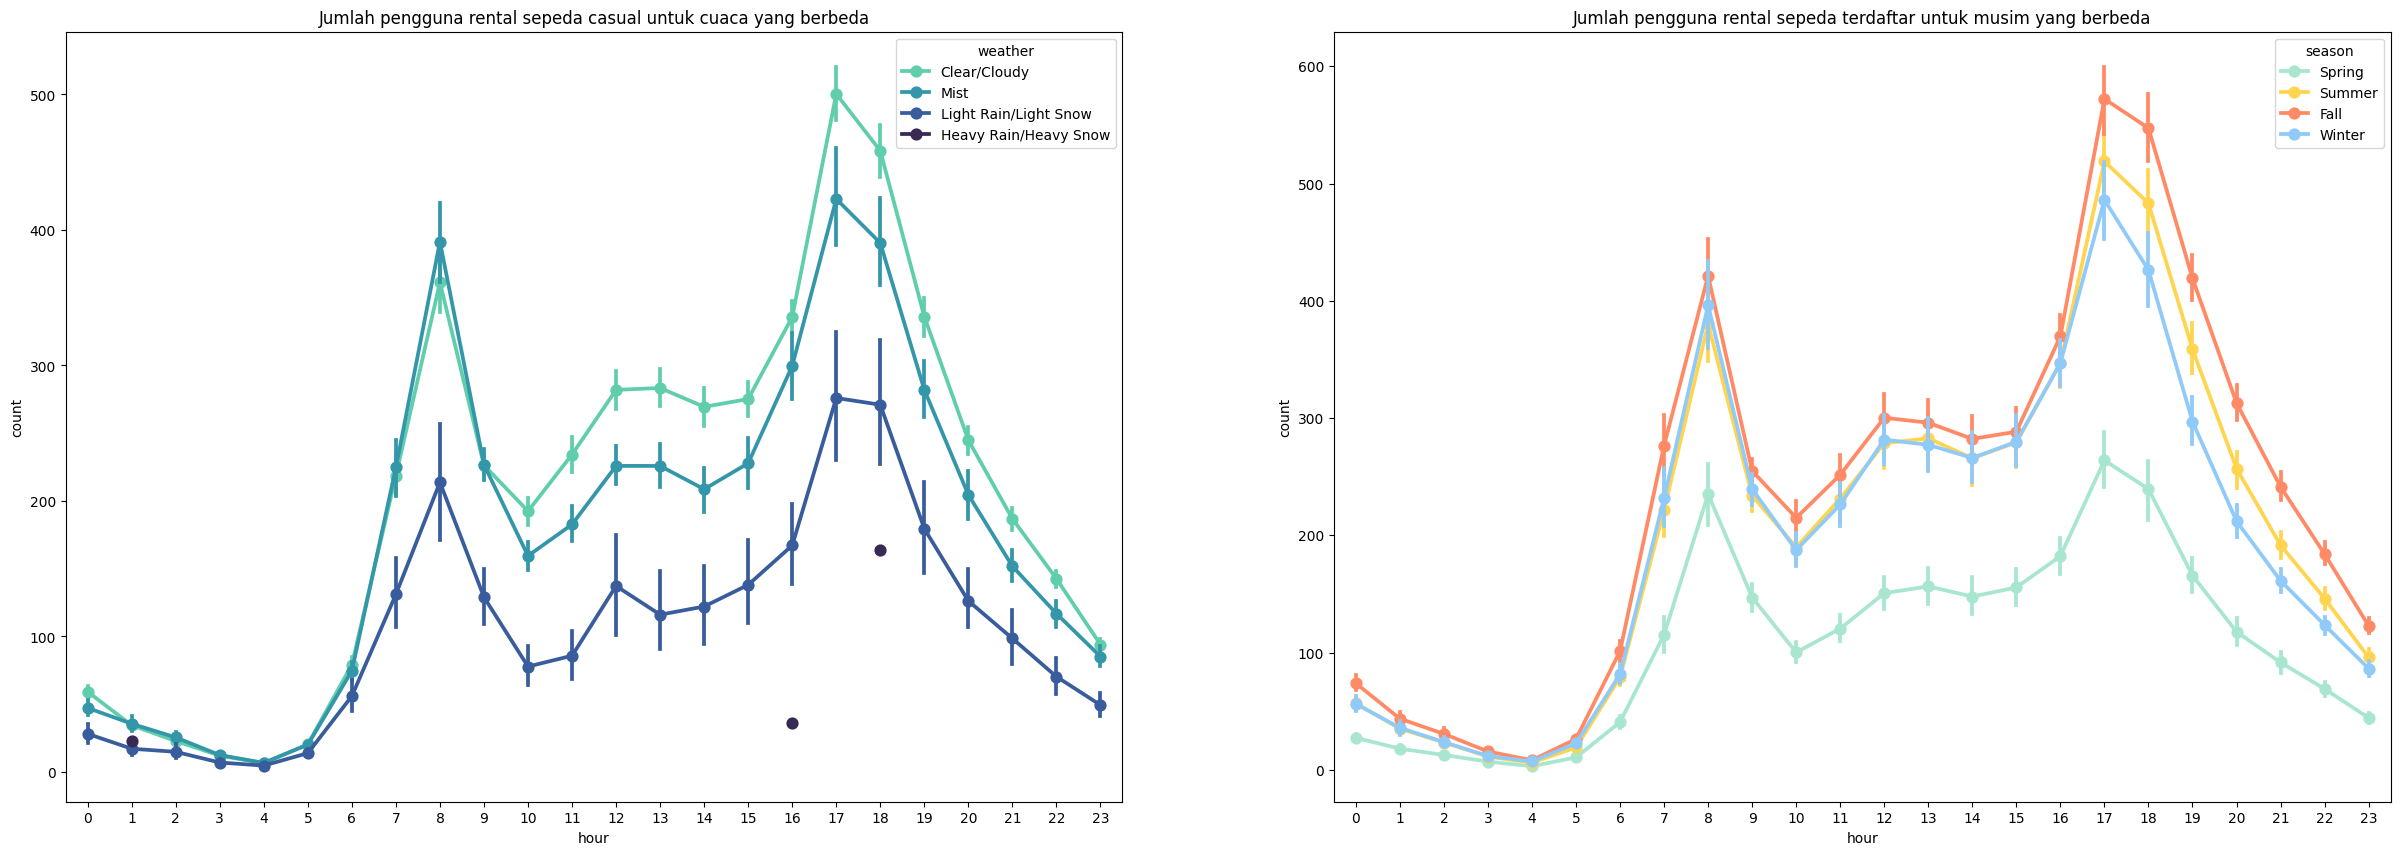

In [42]:
figure, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.pointplot(data=hour_df, x='hour', y='count', hue='weather', palette="mako_r", ax=axes[0])
axes[0].set(title='Jumlah pengguna rental sepeda casual untuk cuaca yang berbeda')

sns.pointplot(data=hour_df, x='hour', y='count', hue='season', palette=custom_palette, ax=axes[1])
axes[1].set(title='Jumlah pengguna rental sepeda terdaftar untuk musim yang berbeda')

plt.show()

Terdapat penurunan jumlah pengguna rental pada cuaca hujan. Penurunan jumlah pengguna rental juga dapat terlihat pada musim semi dan musim dingin. Meskipun demikian, tren penggunaan sepeda terhadap waktu berbeda tetaplah serupa dengan yang telah dijawab pada pertanyaan sebelumnya.

<ipython-input-43-14cddfb6ed3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='month', y='count', palette="viridis_r", showfliers=False, ax=axis)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

[Text(0.5, 1.0, 'Jumlah pengguna berdasarkan bulan')]

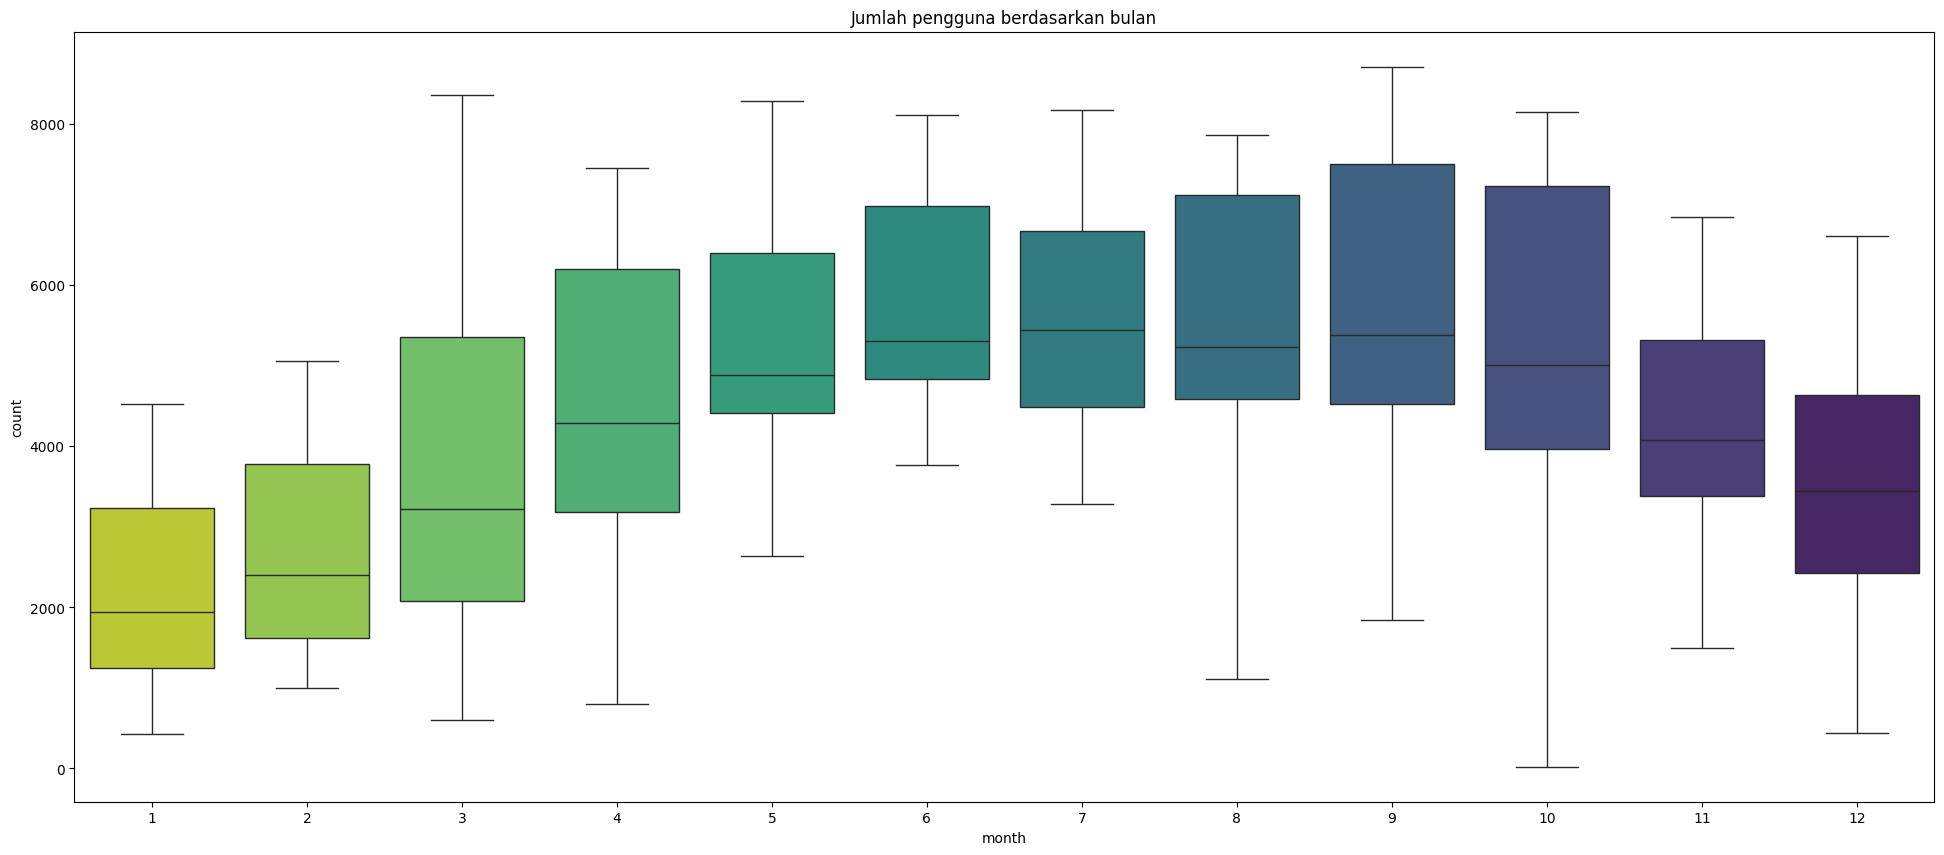

In [43]:
figure, axis = plt.subplots(figsize=(24,10))
sns.boxplot(data=day_df, x='month', y='count', palette="viridis_r", showfliers=False, ax=axis)
axis.set(title='Jumlah pengguna berdasarkan bulan')

Dapat dilihat bahwa jumlah pengguna rental sepeda cukup rendah pada bulan Januari dan Februari, kemudian mulai meningkat dari bulan Maret hingga bulan Mei. Jumlah pengguna cukup konsisten antara bulan Juni hingga September, kemudian mulai menurun dari bulan Oktober. Hal ini cukup sesuai dengan analisis jumlah pengguna berdasarkan musim dan cuaca.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


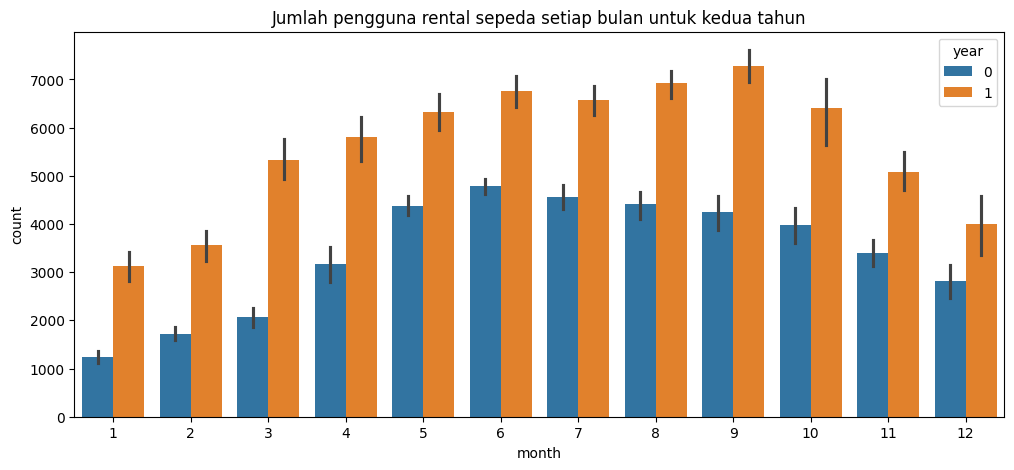

In [44]:
plt.figure(figsize=(12,5))

sns.barplot(x='month', y='count', data=day_df, hue='year')
plt.title("Jumlah pengguna rental sepeda setiap bulan untuk kedua tahun")

plt.show()

Kita dapat melihat adanya peningkatan pengguna bulanan dari tahun pertama ke tahun kedua. Hal ini cukup konsisten untuk setiap bulan dan mengikuti tren jumlah pengguna bulanan dari analisis sebelumnya.

**Insight:**
- Dari informasi yang telah kita dapatkan pada tahap EDA disertai dengan tahap visualisasi data, kita dapat menyatakan bahwa rata-rata jumlah pengguna untuk setiap hari cukup mirip antara satu sama lain. Jumlah penggunaan rental sepeda pada hari kerja memuncak antara pukul 7:00-9:00 dan 16:00-19:00. Sedangkan pada akhir pekan, jumlah penggunaan rental sepeda perlahan meningkat dari pukul 7:00, memuncak pada pukul 12:00-16:00 dan turun perlahan menuju malam hari.
- Terdapat peningkatan signifikan untuk jumlah pengguna casual (yang tidak terdaftar) pada akhir pekan terutama di tengah hari. Di sisi lain, jumlah pengguna terdaftar memiliki bentuk tren menyerupai tren dari penggunaan harian. Hal ini menunjukkan bahwa jumlah pengguna casual cukup mempengaruhi jumlah pengguna total di akhir pekan, tetapi memiliki kontribusi yang cukup kecil pada hari kerja.
- Jumlah pengguna rental sangatlah bergantung pada kondisi cuaca serta musim yang sedang berlangsung.
- Terdapat penurunan jumlah pengguna rental pada cuaca hujan. Penurunan jumlah pengguna rental juga dapat terlihat pada musim semi dan musim dingin. Meskipun demikian, tren penggunaan sepeda terhadap waktu berbeda tetaplah serupa dengan yang telah dijawab pada pertanyaan sebelumnya.
- Dapat dilihat bahwa jumlah pengguna rental sepeda cukup rendah pada bulan Januari dan Februari, kemudian mulai meningkat dari bulan Maret hingga bulan Mei. Jumlah pengguna cukup konsisten antara bulan Juni hingga September, kemudian mulai menurun dari bulan Oktober. Hal ini cukup sesuai dengan analisis jumlah pengguna berdasarkan musim dan cuaca.
- Kita dapat melihat adanya peningkatan pengguna bulanan dari tahun pertama ke tahun kedua. Hal ini cukup konsisten untuk setiap bulan dan mengikuti tren jumlah pengguna bulanan dari analisis sebelumnya.

## Conclusion

- Waktu dan hari mempengaruhi perilaku penggunaan rental sepeda. Tidak ada perbedaan signifikan jumlah pengguna antar hari. Jumlah penggunaan rental sepeda pada hari kerja memuncak antara pukul 7:00-9:00 dan 16:00-19:00. Sedangkan pada akhir pekan, jumlah penggunaan rental sepeda perlahan meningkat dari pukul 7:00, memuncak pada pukul 12:00-16:00 dan turun perlahan menuju malam hari.
- Terdapat peningkatan konsisten untuk jumlah pengguna bulanan dari tahun pertama ke tahun kedua. Cuaca dan musim sangat mempengaruhi jumlah pengguna, terutama pada cuaca hujan yang banyak terjadi pada musim semi. Jumlah pengguna berada pada titik terendah di musim semi, diikuti oleh musim dingin. Jumlah pengguna tertinggi ada pada musim gugur dan musim panas.

In [45]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)